In [6]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [19]:
!cp /content/drive/MyDrive/kaggle datasets/kaggle.json ~/.kaggle/kaggle.json

cp: target '/root/.kaggle/kaggle.json' is not a directory


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as  plt
sns.set_theme(color_codes = True)

In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
df = pd.read_csv('/content/drive/MyDrive/kaggle datasets/Sport car price.csv')
df.head(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
5,BMW,M8,2022,4.4,617,553,3.1,"130,000"
6,Mercedes-Benz,AMG GT,2021,4,523,494,3.8,"118,500"
7,Chevrolet,Corvette,2021,6.2,490,465,2.8,"59,900"
8,Ford,Mustang Shelby GT500,2022,5.2,760,625,3.5,"81,000"
9,Nissan,GT-R Nismo,2021,3.8,600,481,2.5,"212,000"


In [22]:
df.select_dtypes(include='object').nunique()

Car Make                    38
Car Model                  176
Engine Size (L)             45
Horsepower                 124
Torque (lb-ft)              93
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

In [23]:
df['Price (in USD)'].dtypes

dtype('O')

In [24]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '')
df['Price (in USD)'] = df['Price (in USD)'].astype(int)
df['Price (in USD)'].dtypes

dtype('int64')

In [25]:
df.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)              int64
dtype: object

In [26]:
#Change numerical data into integer
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace(',', '')



In [30]:
if df['Horsepower'].dtype == 'object':
    df['Horsepower'] = df['Horsepower'].str.replace('[^0-9]+', '', regex=True)
    df['Horsepower'] = df['Horsepower'].apply(lambda x: int(x) if x != '' else 0)
else:
    pass

if df['Torque (lb-ft)'].dtype == 'object':
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace('[^0-9]+', '', regex=True)
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].fillna(0)
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].apply(lambda x: int(x) if x != '' else 0)
else:
    pass

if df['0-60 MPH Time (seconds)'].dtype == 'object':
    df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace('[^0-9]+', '', regex=True)
    df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].apply(lambda x: int(x) if x != '' else 0)
else:
    pass

df['Horsepower'] = df['Horsepower'].astype(int)
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(int)
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(float)


df.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

In [31]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [32]:
def segment_engine_size(engine_size):
    if engine_size in ['Electric', 'Hybrid']:
        return 'Electric/Hybrid'
    elif engine_size in ['Electric Motor', 'Electric (tri-motor)', 'Electric (93 kWh)', 'Electric (100 kWh)', '2.0 (Electric)']:
        return 'Electric'
    elif engine_size == '1.5 + Electric':
        return '1.5 Hybrid'
    elif engine_size in ['Hybrid (4.0)', '4.0 (Hybrid)']:
        return '4.0 Hybrid'
    elif engine_size == '0':
        return 'Unknown'
    elif engine_size == '-':
        return 'Unknown'
    elif float(engine_size) < 2:
        return 'Small'
    elif float(engine_size) < 3:
        return 'Medium'
    else:
        return 'Large'
df['Engine Size (L)'] = df['Engine Size (L)'].apply(segment_engine_size)

In [33]:
df['Engine Size (L)'].unique()

array(['Large', 'Medium', 'Electric/Hybrid', 'Electric', '1.5 Hybrid',
       'Small', 'Unknown', '4.0 Hybrid'], dtype=object)

In [38]:
df.drop(columns='Car Model', inplace=True)
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,2022,Large,379,331,4.0,101200
1,Lamborghini,2021,Large,630,443,28.0,274390
2,Ferrari,2022,Large,661,561,3.0,333750
3,Audi,2022,Large,562,406,32.0,142700
4,McLaren,2021,Large,710,568,27.0,298000


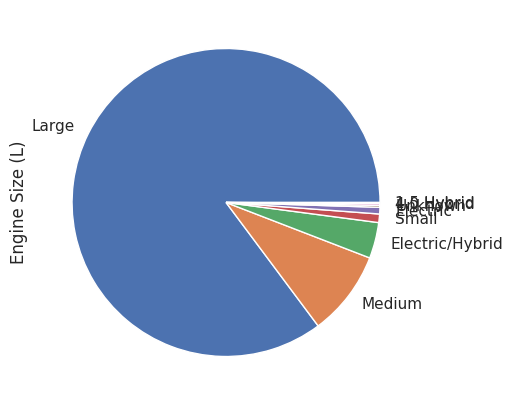

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Engine Size (L)'].value_counts().plot(kind='pie')
plt.show()


In [39]:
df['Car Make'].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [40]:
def segment_car_make(value):
    if value in ['Porsche', 'Lamborghini', 'Ferrari', 'McLaren', 'Aston Martin', 'Bugatti', 'Koenigsegg', 'Lotus', 'Maserati', 'Alfa Romeo', 'Bentley', 'Mercedes-AMG', 'Pagani', 'Pininfarina']:
        return 'Luxury'
    elif value in ['Audi', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Dodge', 'Jaguar', 'Lexus', 'Mazda', 'Rolls-Royce', 'Tesla', 'Toyota', 'Kia']:
        return 'Mainstream'
    elif value in ['Ariel', 'W Motors', 'Shelby', 'TVR', 'Subaru', 'Alpine', 'Ultima']:
        return 'Specialty'
    else:
        return 'Other'

df['Car Make'] = df['Car Make'].apply(segment_car_make)

In [41]:
df['Car Make'].unique()

array(['Luxury', 'Mainstream', 'Specialty', 'Other'], dtype=object)

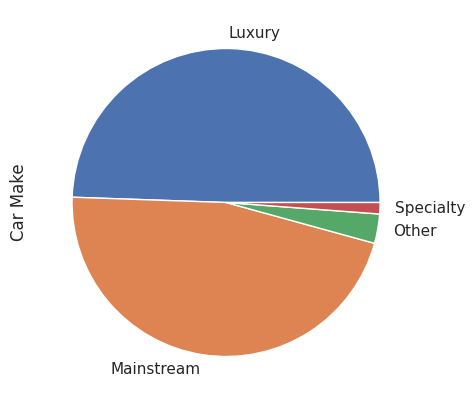

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Car Make'].value_counts().plot(kind='pie')
plt.show()
